<a href="https://colab.research.google.com/github/hellocml/Python/blob/main/jeju_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제주 카페 분포 그리기

[제주카페데이터 다운로드](https://drive.google.com/file/d/1-2VxCRgxnT0lvHYu8oVbus2mn2qsQN48/view?usp=drive_link)

출처: 공공데이터포털

## 1. 필요한 라이브러리 불러오기

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 2. 시각화를 위한 폰트 설정

In [84]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [85]:
# 1. 한글 폰트 설치 (Colab 전용)
!apt-get update -qq
!apt-get install -y fonts-nanum

# 2. matplotlib 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

# 한글 폰트 적용
mpl.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

# 디스플레이 설정 (Retina)
set_matplotlib_formats('retina')  # Retina 디스플레이용
%matplotlib inline


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


/tmp/ipython-input-85-1885049941.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')  # Retina 디스플레이용


##3. 데이터 로드하기

In [86]:
df = pd.read_csv("/content/drive/MyDrive/파이썬/실전/3. 제주카페 분포/cafe.csv", low_memory=False)
df.shape

(3184, 30)

## 4. 데이터 미리보기

In [88]:
# head 로 데이터를 미리보기 합니다. (앞5행 미리보기)
df.head()

상가업소번호            상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  MA010120220800047145             거목        I2       음식      I212    비알코올    
1  MA010120220800042674          협재조랑게        I2       음식      I212    비알코올    
2  MA010120220800059037   메가엠지씨커피제주서홍점        I2       음식      I212    비알코올    
3  MA010120220800052575  리썸룸lissomroom        I2       음식      I212    비알코올    
4  MA010120220800061720             구들        I2       음식      I212    비알코올    

  상권업종소분류코드 상권업종소분류명  시도코드      시도명  ...                        지번주소  \
0    I21201       카페    50  제주특별자치도  ...    제주특별자치도 제주시 한림읍 한림리 1348   
1    I21201       카페    50  제주특별자치도  ...  제주특별자치도 제주시 한림읍 협재리 1454-1   
2    I21201       카페    50  제주특별자치도  ...      제주특별자치도 서귀포시 서홍동 285-3   
3    I21201       카페    50  제주특별자치도  ...  제주특별자치도 제주시 애월읍 광령리 2236-1   
4    I21201       카페    50  제주특별자치도  ...     제주특별자치도 제주시 삼도일동 529-10   

          도로명코드                   도로명 건물본번지                     건물관리번호  \
0  501104847784   제주특별자치도 제주시 한림읍 사가길     3  5011025024013480000007008   
1  501104849106  제주특별자치도 제주시 한림읍 협재1길    55  5011025031014540001012273   
2  501303350347      제주특별자치도 서귀포시 중앙로   199  5013010600102850003000001   
3  501103349019   제주특별자치도 제주시 애월읍 광성로   256  5011025321022360001026406   
4  501103349176       제주특별자치도 제주시 전농로    56  5011010500105290010035468   

                       도로명주소   구우편번호  신우편번호          경도         위도  
0      제주특별자치도 제주시 한림읍 사가길 3  695932  63032  126.263835  33.414764  
1  제주특별자치도 제주시 한림읍 협재1길 55-9  695934  63011  126.245133  33.399424  
2       제주특별자치도 서귀포시 중앙로 199  697849  63584  126.558535  33.262257  
3  제주특별자치도 제주시 애월읍 광성로 256-2  695900  63062  126.434363  33.459810  
4         제주특별자치도 제주시 전농로 56  690812  63176  126.519094  33.504301  

[5 rows x 30 columns]

## 5. 데이터 요약하기


In [89]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     3184 non-null   object 
 1   상호명        3184 non-null   object 
 2   상권업종대분류코드  3184 non-null   object 
 3   상권업종대분류명   3184 non-null   object 
 4   상권업종중분류코드  3184 non-null   object 
 5   상권업종중분류명   3184 non-null   object 
 6   상권업종소분류코드  3184 non-null   object 
 7   상권업종소분류명   3184 non-null   object 
 8   시도코드       3184 non-null   int64  
 9   시도명        3184 non-null   object 
 10  시군구코드      3184 non-null   int64  
 11  시군구명       3184 non-null   object 
 12  행정동코드      3184 non-null   int64  
 13  행정동명       3184 non-null   object 
 14  법정동코드      3184 non-null   int64  
 15  법정동명       3184 non-null   object 
 16  지번코드       3184 non-null   int64  
 17  대지구분코드     3184 non-null   int64  
 18  대지구분명      3184 non-null   object 
 19  지번본번지      3184 non-null   int64  
 20  지번주소    

## 6. 그룹화된 요약값 보기 - value_counts

In [91]:
# 행정동별 카페수 세기
df["행정동명"].value_counts()

행정동명
애월읍     231
이도2동    208
노형동     204
구좌읍     201
조천읍     169
한림읍     154
아라동     148
대정읍     131
연동      126
안덕면     121
성산읍     110
한경면     104
남원읍      98
표선면      75
대륜동      68
일도2동     63
동홍동      61
외도동      59
이도1동     57
용담2동     57
오라동      47
중문동      46
일도1동     45
중앙동      44
화북동      43
삼양동      42
우도면      41
삼도1동     40
삼도2동     37
대천동      36
예래동      32
천지동      32
서홍동      31
정방동      31
송산동      28
효돈동      27
건입동      25
용담1동     24
영천동      24
이호동      21
도두동      18
봉개동      17
추자면       8
Name: count, dtype: int64

<Axes: xlabel='행정동명'>

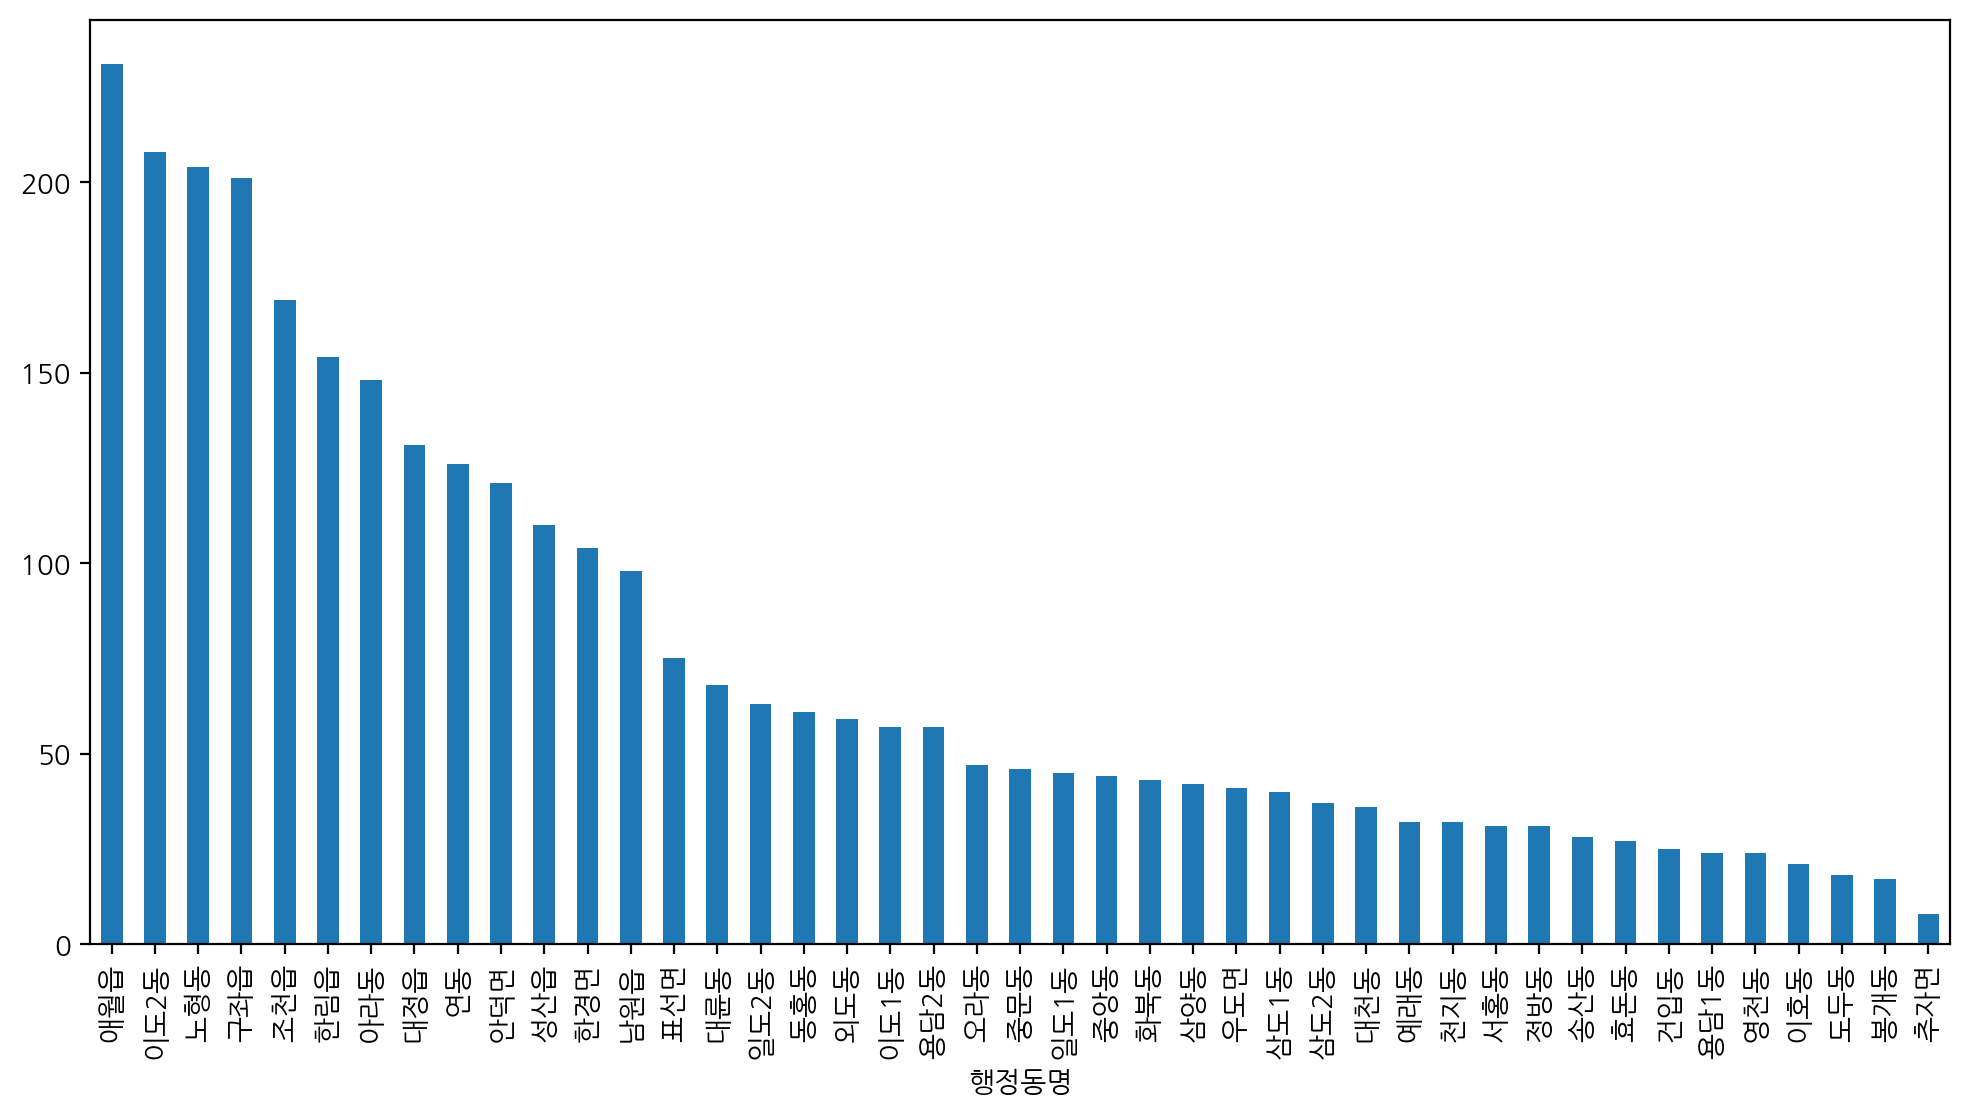

In [99]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그리기
df["행정동명"].value_counts().plot(kind='bar', figsize=(12, 6), width=0.5)

<Axes: xlabel='count', ylabel='시군구명'>

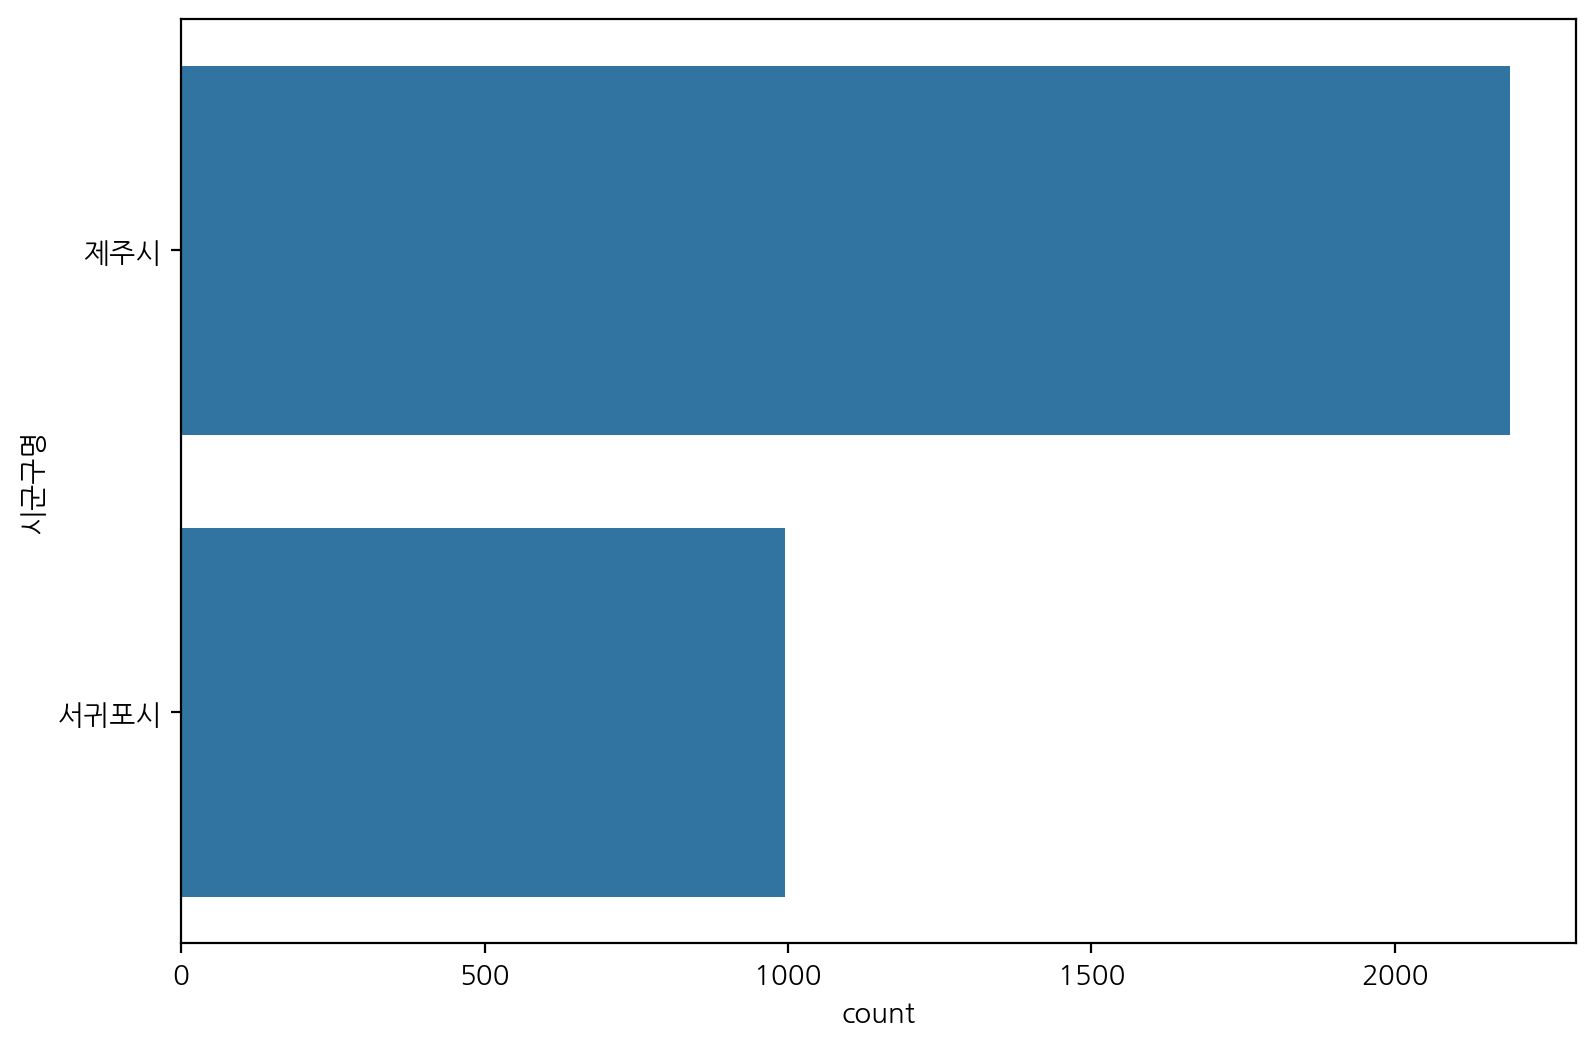

In [102]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_cafe 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(9, 6))
sns.countplot(data=df, y="시군구명")

<Axes: >

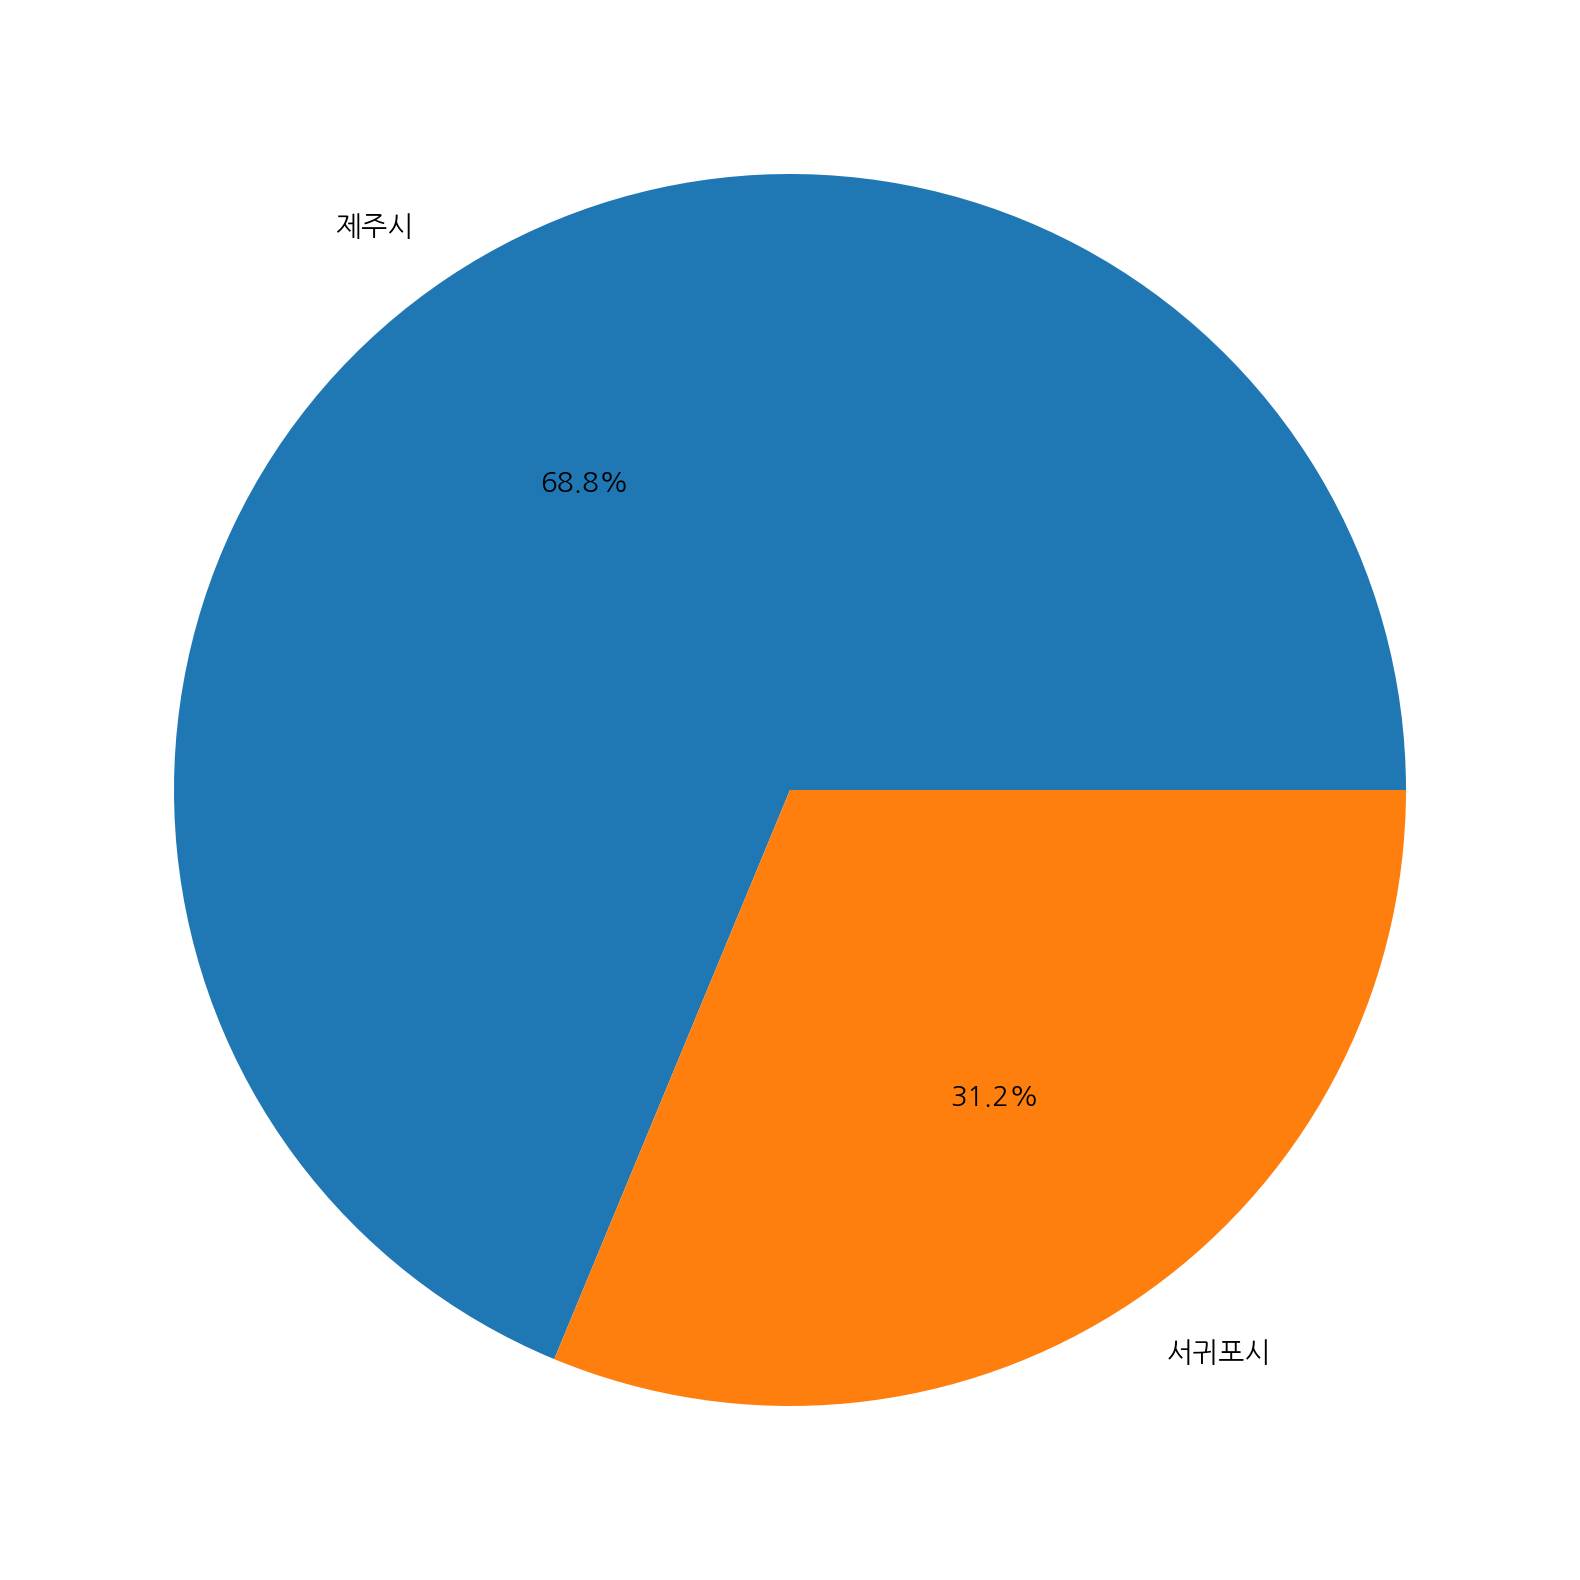

In [104]:
df["시군구명"].value_counts().plot.pie(figsize=(10, 10), autopct="%.1f%%", ylabel='')


## 7. 제주 카페 분포 보기

<Axes: xlabel='경도', ylabel='위도'>

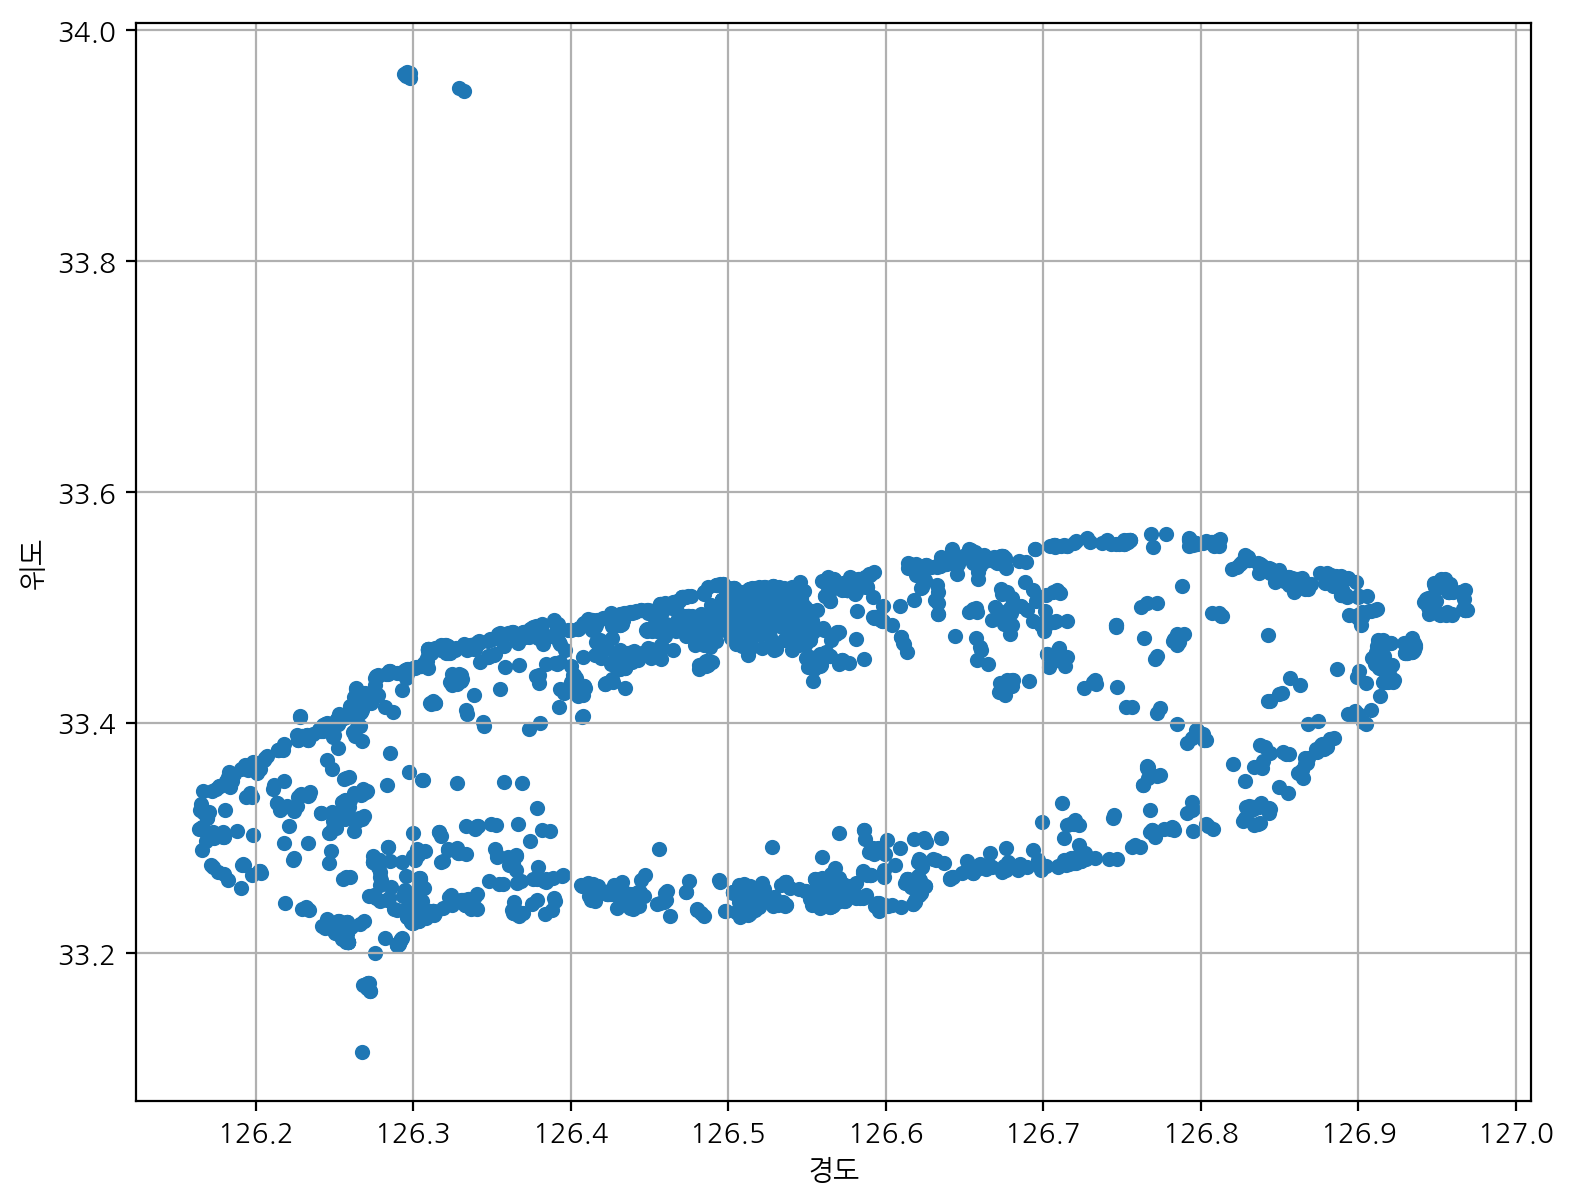

In [94]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

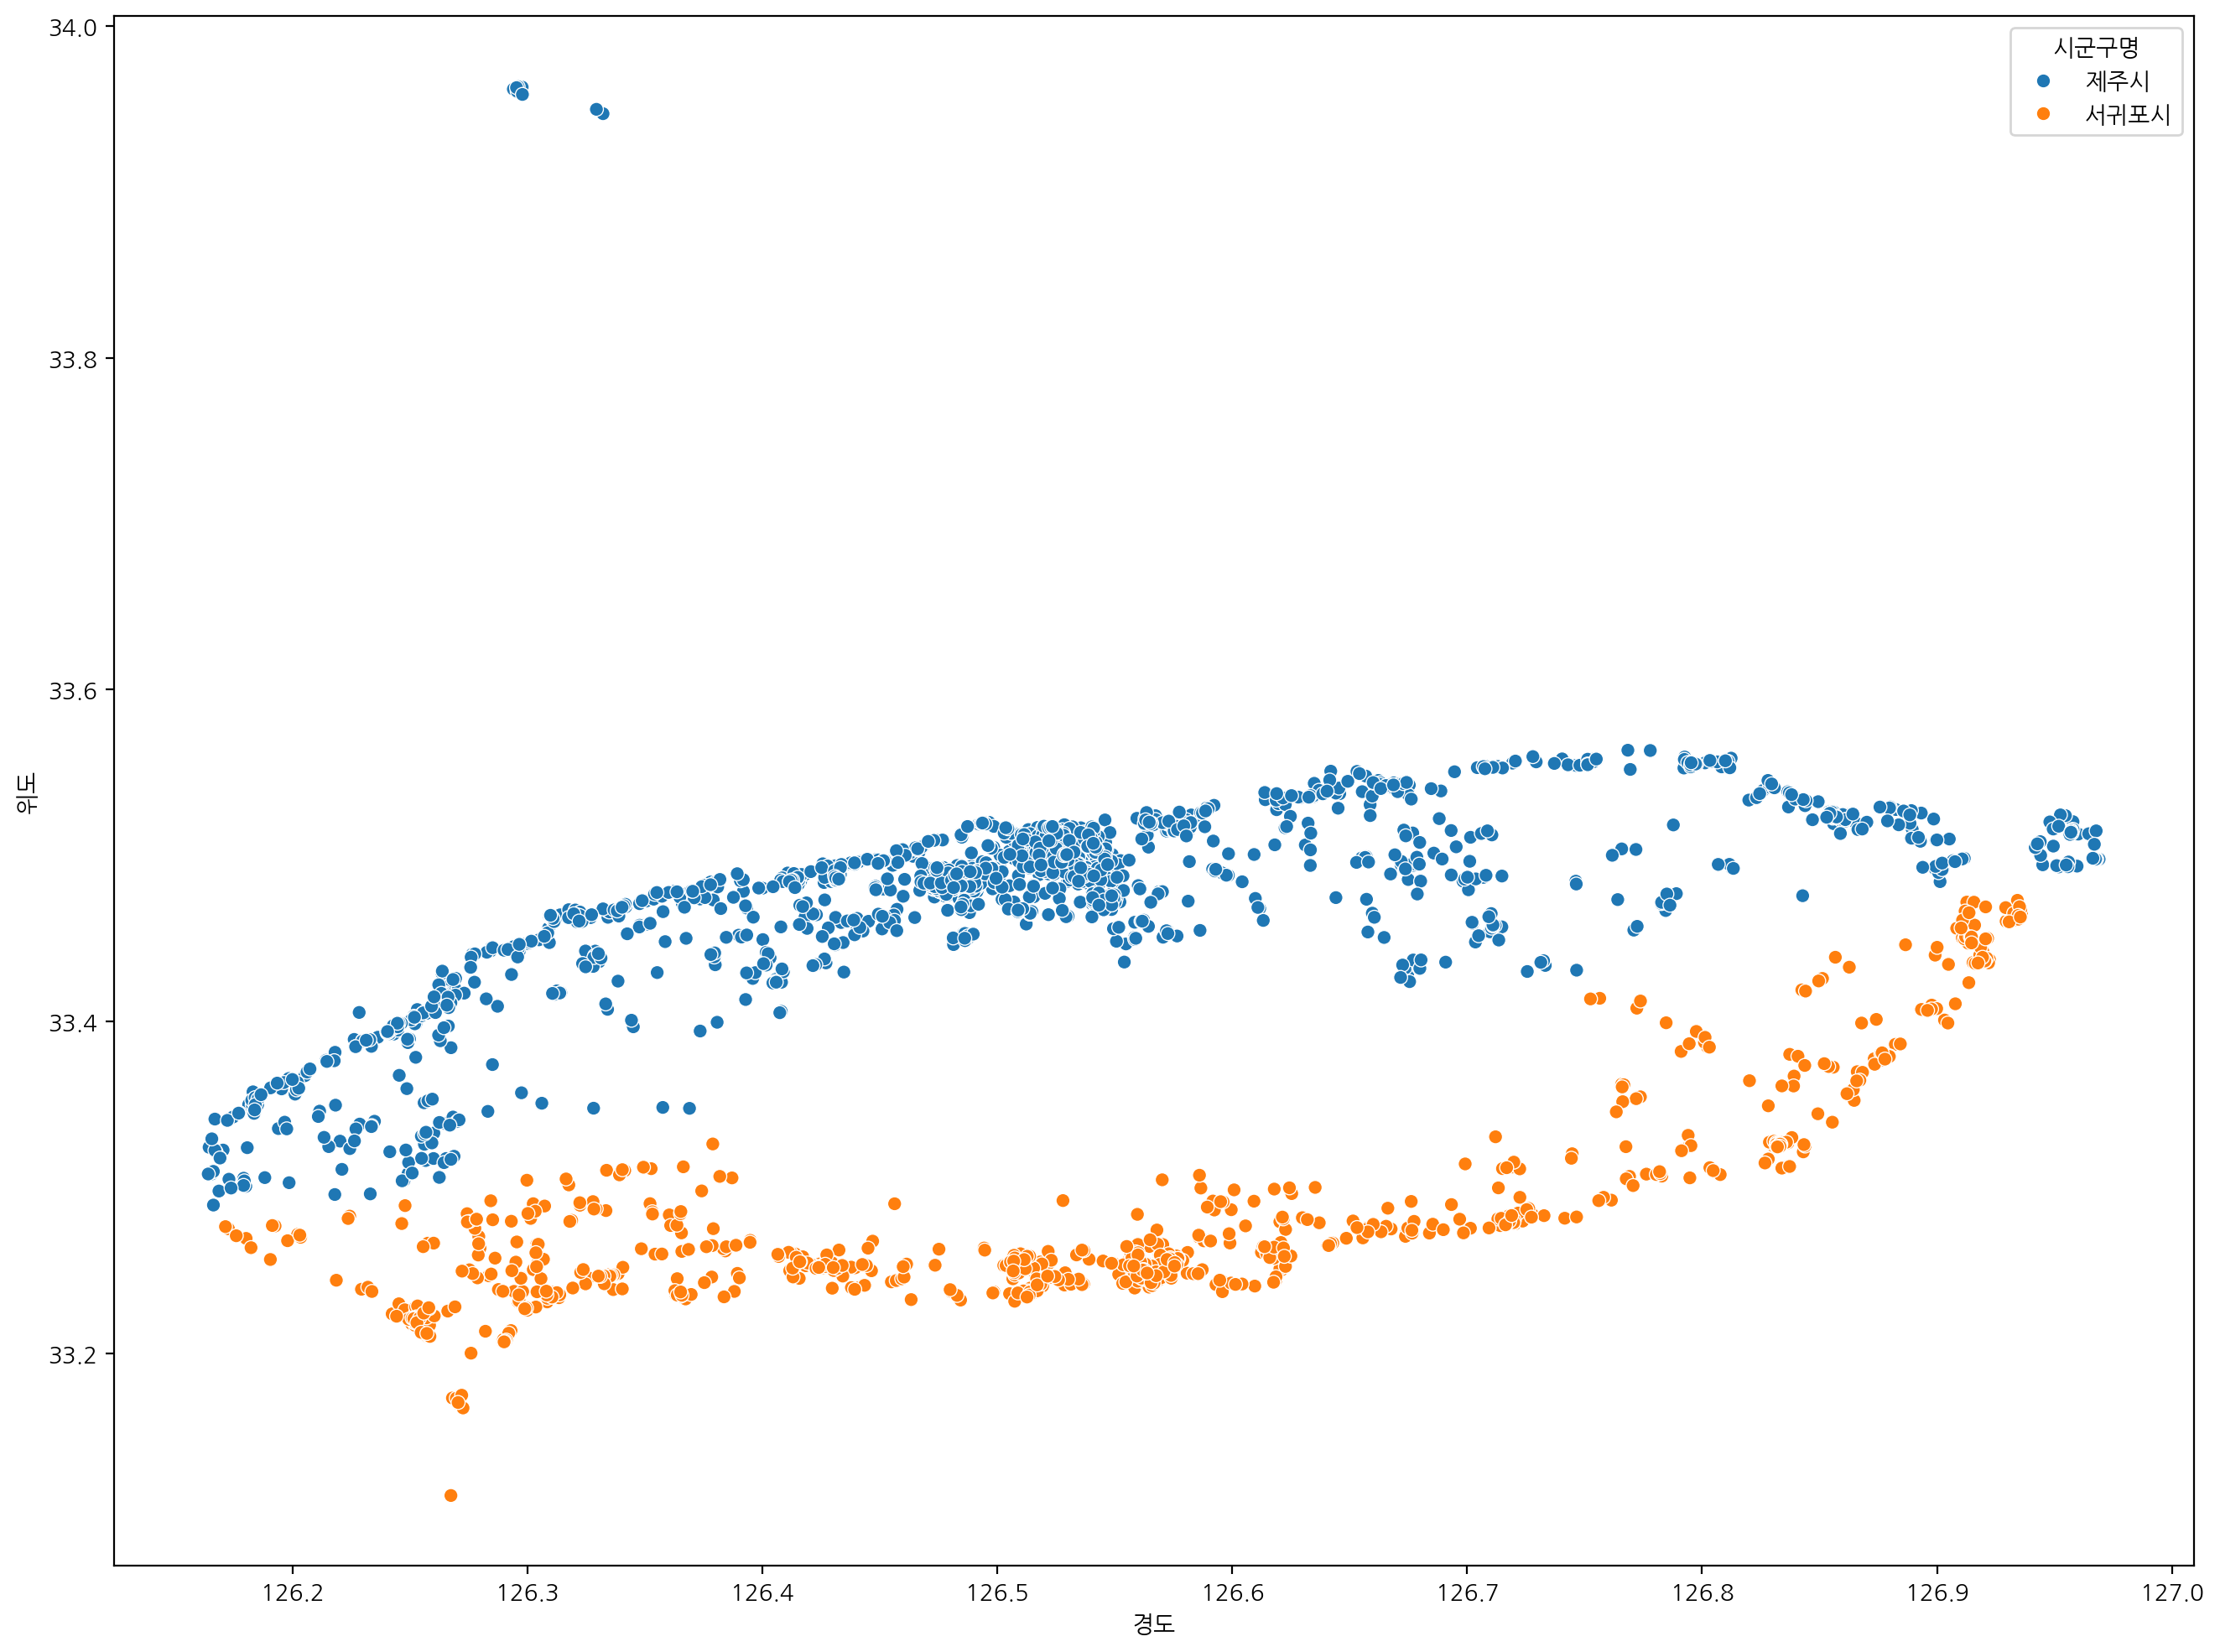

In [95]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시하
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df,
                x='경도', y='위도', hue='시군구명')

In [96]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리
import folium

In [97]:
# geo_df 에 df_cafe를 copy() 로 복사해서 할당합니다.
geo_df = df.copy()

In [98]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
fmap = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    # 상호명과 주소를 붙여서 출력되도록 합니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']

    folium.Marker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        popup=popup_name,
        tooltip=popup_name
    ).add_to(fmap)


fmap